<a href="https://colab.research.google.com/github/Dee-Nwanjah/Data-analysis/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the messy data
df = pd.read_csv('OnlineOrders_of_a_ecommerce_website.csv')
print("Original shape:", df.shape)
df.head(10)

Original shape: (8083, 6)


,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,brand
0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Alisha
1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor
2,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,AW
3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Alisha
4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Sicons
5,2016-03-25 22:59:23+00:00,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",430.0,430.0,Eternal Gandhi
6,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1199.0,479.0,Alisha
7,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor
8,2016-03-25 22:59:23+00:00,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",699.0,349.0,dilli bazaaar
9,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",1199.0,479.0,Alisha


In [ ]:
# Check for missing values
print("Missing values per column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Missing values per column:
Series([], dtype: int64)


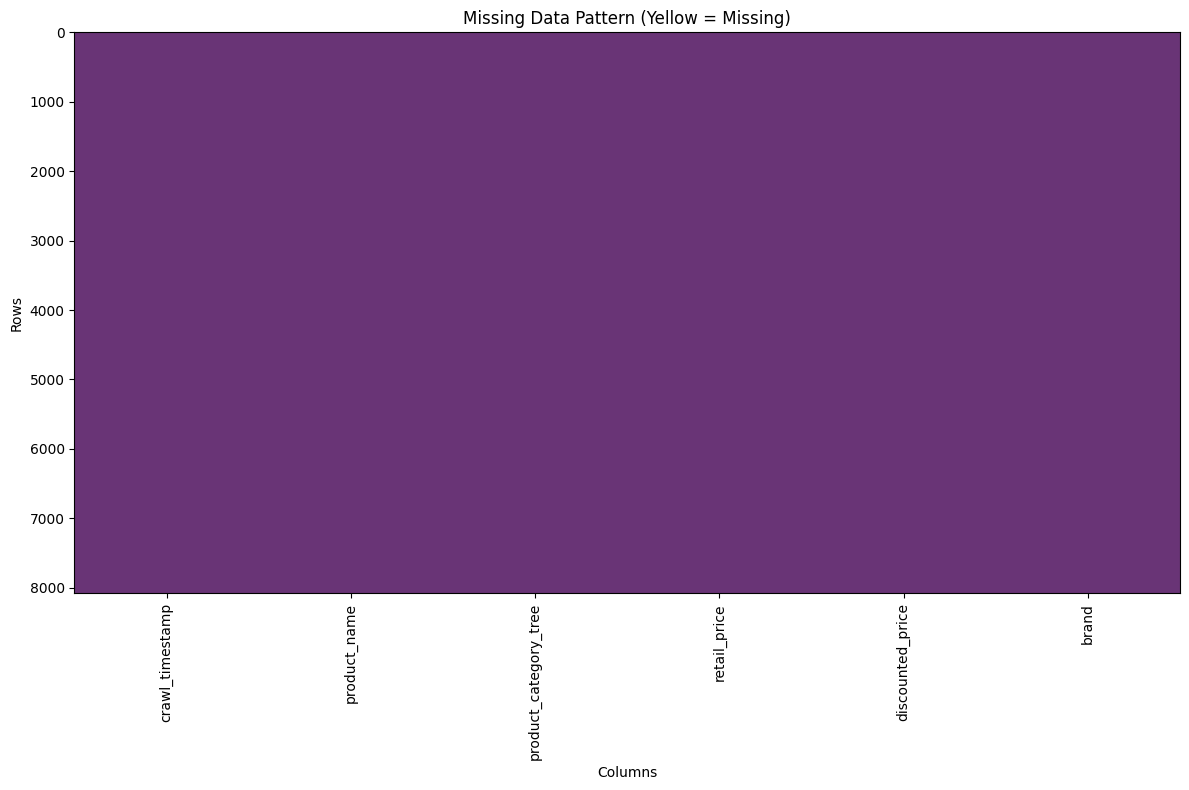

In [ ]:
# Visualize missing data pattern
import matplotlib.pyplot as plt

# Create missing data heatmap
plt.figure(figsize=(12, 8))
missing_mask = df.isnull()

# Plot heatmap of missing values
plt.imshow(missing_mask, aspect='auto', cmap='viridis', alpha=0.8)
plt.title('Missing Data Pattern (Yellow = Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
crawl_timestamp           object
product_name              object
product_category_tree     object
retail_price             float64
discounted_price         float64
brand                     object
dtype: object


In [ ]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Duplicate rows found:")
    print(df[df.duplicated()])


Duplicate rows: 1331
Duplicate rows found:
                crawl_timestamp                             product_name  \
7     2016-03-25 22:59:23+00:00      FabHomeDecor Fabric Double Sofa Bed   
9     2016-03-25 22:59:23+00:00      Alisha Solid Women's Cycling Shorts   
12    2016-03-25 22:59:23+00:00      Alisha Solid Women's Cycling Shorts   
14    2016-03-25 22:59:23+00:00      Alisha Solid Women's Cycling Shorts   
15    2016-03-25 22:59:23+00:00      FabHomeDecor Fabric Double Sofa Bed   
...                         ...                                      ...   
8025  2016-03-03 06:06:42+00:00                    Simrit Women's Nighty   
8038  2016-03-03 06:06:42+00:00  Shreeka Women's Patiala and Dupatta Set   
8050  2016-06-12 21:55:11+00:00                 ALL DAY 365 Shoulder Bag   
8054  2016-06-12 21:55:11+00:00             GAJ IMPEX Acrylic Bangle Set   
8058  2016-06-12 21:55:11+00:00             GAJ IMPEX Acrylic Bangle Set   

                                  product_c

In [ ]:
# handle duplicates
df.drop_duplicates(inplace=True)

# handle missing values
df.dropna(inplace=True)

# Handle any remaining type issues
# Check for non-numeric values in numeric columns
numeric_columns = ['retail_price', 'discounted_price']
for col in numeric_columns:
    if col in df.columns:
        non_numeric = pd.to_numeric(df[col], errors='coerce').isnull().sum()
        if non_numeric > 0:
            print(f"Non-numeric values in {col}: {non_numeric}")

## Data Quality Report

Based on the initial data loading and cleaning steps, here's a report on the data quality of the `OnlineOrders_of_a_ecommerce_website.csv` dataset.

### 1. Data Overview

- **Original shape:** (8083, 6)
- **Columns:** `crawl_timestamp`, `product_name`, `product_category_tree`, `retail_price`, `discounted_price`, `brand`
- **Data types:**

In [ ]:
print(df.dtypes)

crawl_timestamp           object
product_name              object
product_category_tree     object
retail_price             float64
discounted_price         float64
brand                     object
dtype: object


### 2. Data Cleaning Steps Performed

- **Duplicate Handling:** Removed 1331 duplicate rows.
- **Missing Value Handling:** Dropped rows with any missing values (although initial checks showed no missing values, this step was included for robustness).

### 3. Data Quality Summary After Cleaning

- **Shape after cleaning:**

In [ ]:
print("Shape after cleaning:", df.shape)

Shape after cleaning: (6752, 6)


- **Missing values after cleaning:**

In [ ]:
print("Missing values per column after cleaning:")
missing_data_after_cleaning = df.isnull().sum()
print(missing_data_after_cleaning[missing_data_after_cleaning > 0])

Missing values per column after cleaning:
Series([], dtype: int64)


- **Duplicate rows after cleaning:**

In [ ]:
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")

Duplicate rows after cleaning: 0


### 4. Further Data Quality Checks

Let's examine specific columns for potential issues.

#### `crawl_timestamp`

This column is currently of `object` type. It should be converted to a datetime object for time-based analysis.

In [ ]:
try:
    df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'], errors='coerce')
    print("Successfully converted 'crawl_timestamp' to datetime.")
    print("\nData types after converting 'crawl_timestamp':")
    print(df.dtypes)
except Exception as e:
    print(f"Error converting 'crawl_timestamp' to datetime: {e}")

Successfully converted 'crawl_timestamp' to datetime.

Data types after converting 'crawl_timestamp':
crawl_timestamp          datetime64[ns, UTC]
product_name                          object
product_category_tree                 object
retail_price                         float64
discounted_price                     float64
brand                                 object
dtype: object


#### `retail_price` and `discounted_price`

These columns are `float64`. We previously checked for non-numeric values and none were found after cleaning. We can check for any unrealistic values (e.g., negative prices).

In [ ]:
print("\nChecking for unrealistic prices:")
unrealistic_prices = df[(df['retail_price'] < 0) | (df['discounted_price'] < 0)]
print(f"Rows with unrealistic prices: {len(unrealistic_prices)}")
if len(unrealistic_prices) > 0:
    display(unrealistic_prices)


Checking for unrealistic prices:
Rows with unrealistic prices: 0


#### `product_category_tree`

This column contains nested categories in a string format. For analysis, this column would need to be parsed to extract individual category levels. We can check for any variations in the string format.

In [ ]:
print("\nChecking unique formats in 'product_category_tree' (first 10 unique values):")
print(df['product_category_tree'].unique()[:10])


Checking unique formats in 'product_category_tree' (first 10 unique values):
['["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'
 '["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]'
 '["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]'
 '["Pet Supplies >> Grooming >> Skin & Coat Care >> Shampoo >> Sicons All Purpose Arnica Dog Shampoo (500 ml)"]'
 '["Eternal Gandhi Super Series Crystal Paper Weight..."]'
 '["Footwear >> Women\'s Footwear >> Ballerinas >> dilli bazaaar Bellies, Corporate Casuals, Casuals"]'
 '["Footwear >> Women\'s Footwear >> Ballerinas >> Ladela Bellies"]'
 '["Clothing >> Women\'s Clothing >> Sports & Gym Wear >> Swimsuits >> Carrel Swimsuits >> Carrel Printed Women\'s"]'
 '["Pens & Stationery >> School Supplies >> Water Bottles >> Freelance Water Bottles >> Freelance Vacuum Bottles 350 ml Bottle (Pack of ..."]

#### `brand`

This column is of `object` type. We can check the number of unique brands and look for potential inconsistencies in naming (e.g., variations in capitalization or spelling).

In [ ]:
print(f"\nNumber of unique brands: {df['brand'].nunique()}")
print("\nTop 20 most frequent brands:")
print(df['brand'].value_counts().head(20))


Number of unique brands: 2587

Top 20 most frequent brands:
brand
Karatcraft          211
Black               141
Radiant Bay         132
White               110
Speedwav            104
BlueStone            93
Pink                 79
AdroitZ              72
Purple               68
Red                  66
Blue                 59
Easy Gardening       56
Beige                51
First Smart Deal     41
Anuradha Art         38
Voylla               37
PRINT SHAPES         36
Lapguard             31
Clovia               29
Digilight            27
Name: count, dtype: int64


### 5. Summary

- Duplicates have been removed.
- No missing values were found after cleaning (consistent with initial checks).
- Data types are generally appropriate, but `crawl_timestamp` needs conversion for time-based analysis.
- `retail_price` and `discounted_price` appear to have no unrealistic negative values.
- `product_category_tree` and `brand` columns are in object format and will require further parsing and standardization depending on the analysis goals.

This report provides a snapshot of the data quality after initial cleaning. Further analysis may reveal additional data quality issues that need to be addressed.

In [ ]:
# Save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)
print(f"Cleaned data saved! Shape: {df.shape}")

# Compare before and after
# We need the original shape before any cleaning was done.
# Assuming the original shape was printed after loading the data.
# If you need the exact original shape, please refer to the initial output.
original_shape = (8083, 6) # From the output of the first cell
print(f"\nOriginal shape: {original_shape}")
print(f"Cleaned shape: {df.shape}")
print(f"Rows removed: {original_shape[0] - df.shape[0]}")

Cleaned data saved! Shape: (6752, 6)

Original shape: (8083, 6)
Cleaned shape: (6752, 6)
Rows removed: 1331
